In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
import os
print(os.getcwd())

/Users/haolan/Library/CloudStorage/OneDrive-TheUniversityofSydney(Students)/USYD/ML/robustness-dataset


In [11]:
# df_imagenet = pd.read_csv('./archive_results/imagenet_results.csv')
df_cifar10 = pd.read_csv('./cifar10_full.csv')
# df_cifar100 = pd.read_csv('./archive_results/cifar100_results.csv')
df_cifar10_robustness = pd.read_csv('./attack_acc.csv')
df_cifar10_corruption = pd.read_csv('./corruption_acc.csv')
print(df_cifar10_robustness.columns)
print(df_cifar10_corruption.columns)
print(df_cifar10.columns)

Index(['clean_acc', 'fgsm_Linf_acc0_1', 'fgsm_Linf_acc0_5', 'fgsm_Linf_acc1_0',
       'fgsm_Linf_acc2_0', 'fgsm_Linf_acc3_0', 'fgsm_Linf_acc4_0',
       'fgsm_Linf_acc5_0', 'fgsm_Linf_acc6_0', 'fgsm_Linf_acc7_0',
       'fgsm_Linf_acc8_0', 'fgsm_Linf_acc255_0', 'pgd_Linf_acc0_1',
       'pgd_Linf_acc0_5', 'pgd_Linf_acc1_0', 'pgd_Linf_acc2_0',
       'pgd_Linf_acc3_0', 'pgd_Linf_acc4_0', 'pgd_Linf_acc8_0',
       'aa_apgd_ce_Linf_acc0_1', 'aa_apgd_ce_Linf_acc0_5',
       'aa_apgd_ce_Linf_acc1_0', 'aa_apgd_ce_Linf_acc2_0',
       'aa_apgd_ce_Linf_acc3_0', 'aa_apgd_ce_Linf_acc4_0',
       'aa_apgd_ce_Linf_acc8_0', 'aa_square_Linf_acc0_1',
       'aa_square_Linf_acc0_5', 'aa_square_Linf_acc1_0',
       'aa_square_Linf_acc2_0', 'aa_square_Linf_acc3_0',
       'aa_square_Linf_acc4_0', 'aa_square_Linf_acc8_0'],
      dtype='object')
Index(['brightness', 'contrast', 'defocus_blur', 'elastic_transform', 'fog',
       'frost', 'gaussian_noise', 'glass_blur', 'impulse_noise',
       'jpeg_compre

In [12]:
df_cifar10_aucroc = df_cifar10[['pre_auc_cifar10c', 'pre_auc_svhn']]
print(df_cifar10_aucroc)

       pre_auc_cifar10c  pre_auc_svhn
0              0.818109      0.825915
1              0.818192      0.909677
2              0.787037      0.882501
3              0.810043      0.834379
4              0.945967      0.833953
...                 ...           ...
15620          0.707253      0.807911
15621          0.901756      0.820748
15622          0.797974      0.840497
15623          0.562665      0.781808
15624          0.604755      0.874459

[15625 rows x 2 columns]


In [13]:
df1 = pd.read_csv("../project_calibration/public_results/cifar10_results.csv")
df2 = pd.read_csv("../project_calibration/public_results/cifar10_post.csv")
df1.sort_values('config')
df2.sort_values('config')
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
print(df1)
# print(df2.columns)
merged_columns = []
for column in df1.columns:
    if column != 'config' and column != 'dataset' and column != 'arch':
        merged_columns.append('pre_' + column)
        merged_columns.append('post_' + column)
    else:
        merged_columns.append(column)
merged_df_cifar10 = pd.DataFrame(columns=merged_columns)
for column in df1.columns:
    if column != 'config' and column != 'dataset' and column != 'arch':
        merged_df_cifar10['pre_' + column] = df1[column]
        merged_df_cifar10['post_' + column] = df2[column]
    else:
        merged_df_cifar10[column] = df1[column]

print(merged_df_cifar10)

       config     acc  dataset  \
0           0  0.8427  cifar10   
1           1  0.9320  cifar10   
2           2  0.8500  cifar10   
3           3  0.8550  cifar10   
4           4  0.8663  cifar10   
...       ...     ...      ...   
15620   15618  0.7365  cifar10   
15621   15620  0.8551  cifar10   
15622   15621  0.8775  cifar10   
15623   15622  0.9230  cifar10   
15624   15623  0.6810  cifar10   

                                                    arch     ECE_5    ECE_10  \
0      |avg_pool_3x3~0|+|nor_conv_1x1~0|skip_connect~...  0.046592  0.046592   
1      |nor_conv_3x3~0|+|nor_conv_3x3~0|avg_pool_3x3~...  0.046002  0.046094   
2      |avg_pool_3x3~0|+|nor_conv_3x3~0|nor_conv_3x3~...  0.036575  0.036691   
3      |avg_pool_3x3~0|+|skip_connect~0|none~1|+|none...  0.020423  0.020844   
4      |skip_connect~0|+|skip_connect~0|nor_conv_1x1~...  0.025379  0.025379   
...                                                  ...       ...       ...   
15620  |none~0|+|none~0|nor_con

In [14]:
df_cifar10_all = pd.concat([merged_df_cifar10, df_cifar10_aucroc, df_cifar10_robustness, df_cifar10_corruption], axis=1)
print(df_cifar10_all)
# df_cifar10_all.to_csv('./cifar10_all.csv')

       config  pre_acc  post_acc  dataset  \
0           0   0.8427  0.845750  cifar10   
1           1   0.9320  0.932375  cifar10   
2           2   0.8500  0.852250  cifar10   
3           3   0.8550  0.857375  cifar10   
4           4   0.8663  0.868250  cifar10   
...       ...      ...       ...      ...   
15620   15618   0.7365  0.740000  cifar10   
15621   15620   0.8551  0.857500  cifar10   
15622   15621   0.8775  0.879000  cifar10   
15623   15622   0.9230  0.924375  cifar10   
15624   15623   0.6810  0.681500  cifar10   

                                                    arch  pre_ECE_5  \
0      |avg_pool_3x3~0|+|nor_conv_1x1~0|skip_connect~...   0.046592   
1      |nor_conv_3x3~0|+|nor_conv_3x3~0|avg_pool_3x3~...   0.046002   
2      |avg_pool_3x3~0|+|nor_conv_3x3~0|nor_conv_3x3~...   0.036575   
3      |avg_pool_3x3~0|+|skip_connect~0|none~1|+|none...   0.020423   
4      |skip_connect~0|+|skip_connect~0|nor_conv_1x1~...   0.025379   
...                              

In [15]:
# Read the CSV file

import pandas as pd
import ast
from robustness_dataset import RobustnessDataset

data = RobustnessDataset()
# Read the csv file into a pandas DataFrame
df = pd.read_csv("../project_calibration/public_results/cifar10_results.csv")
# df = expanded_df
config = df['config']
# print(df)
# Extract the required columns

# print(config)
ece_data = df['ECE_15']
ece_em_data = df['ECE_em_15']
cwece = df['cwCE_15']
cwece_em = df['cwCE_em_15']
kdeece = df['KDECE']


# Create a new DataFrame with the extracted values
final_df = pd.DataFrame({'config': config, 'ece': ece_data, 'adaece': ece_em_data, 'cwece': cwece, 'cwece_em': cwece_em, 'kdeece': kdeece})
sorted_df = final_df.sort_values('config')
# print(sorted_df[sorted_df['config'] == 9469])
sorted_df = sorted_df.drop('config', axis=1)
sorted_df.reset_index(drop=True, inplace=True)
print(sorted_df)


            ece    adaece     cwece  cwece_em    kdeece
0      0.046592  0.046597  0.010824  0.009089  0.039908
1      0.046332  0.045835  0.010039  0.005138  0.042032
2      0.036951  0.036347  0.009504  0.007965  0.030255
3      0.021655  0.019880  0.007422  0.006240  0.018864
4      0.025379  0.025380  0.008497  0.007609  0.020144
...         ...       ...       ...       ...       ...
15620  0.018556  0.018817  0.007012  0.006452  0.015928
15621  0.053727  0.053673  0.011654  0.008571  0.046773
15622  0.050713  0.050713  0.010603  0.005507  0.045780
15623  0.054121  0.052992  0.013647  0.012520  0.051272
15624  0.034578  0.034504  0.009135  0.007806  0.029205

[15625 rows x 5 columns]


In [16]:
# Select specific columns from each DataFrame
df1_selected = df_cifar10_robustness[['clean_acc', 'fgsm_Linf_acc1_0', 'pgd_Linf_acc1_0', "aa_apgd_ce_Linf_acc1_0", "aa_square_Linf_acc1_0"]]
df2_selected = df_cifar10[['pre_auc_cifar10c', 'pre_auc_svhn','15bins-ece-pre',
       '15bins-adaece-pre', '15bins-classece-pre']]

# Concatenate the selected columns into a new DataFrame
combined_df = pd.concat([df1_selected, df_cifar10_corruption, df2_selected], axis=1)

print(combined_df)

       clean_acc  fgsm_Linf_acc1_0  pgd_Linf_acc1_0  aa_apgd_ce_Linf_acc1_0  \
0          0.856             0.350            0.295                   0.186   
1          0.938             0.619            0.378                   0.161   
2          0.858             0.431            0.391                   0.292   
3          0.868             0.317            0.258                   0.159   
4          0.881             0.337            0.234                   0.117   
...          ...               ...              ...                     ...   
15620      0.869             0.315            0.274                   0.169   
15621      0.892             0.411            0.325                   0.195   
15622      0.925             0.602            0.386                   0.151   
15623      0.694             0.453            0.467                   0.427   
15624      0.856             0.338            0.212                   0.099   

       aa_square_Linf_acc1_0  brightness  contrast 

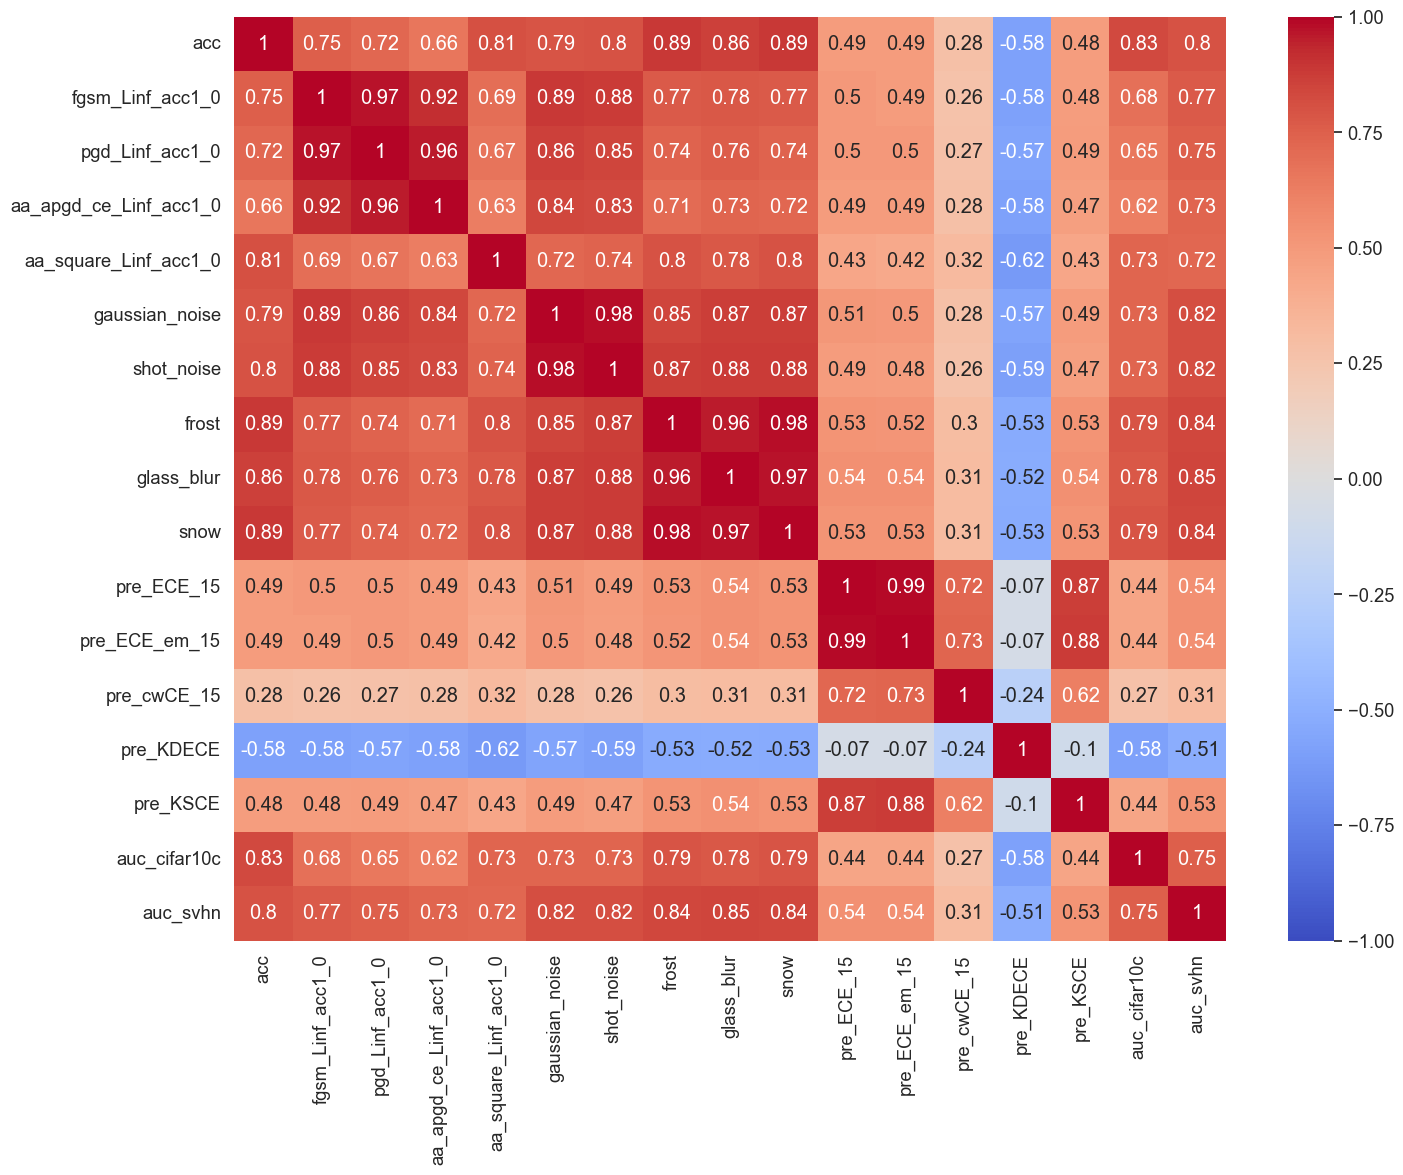

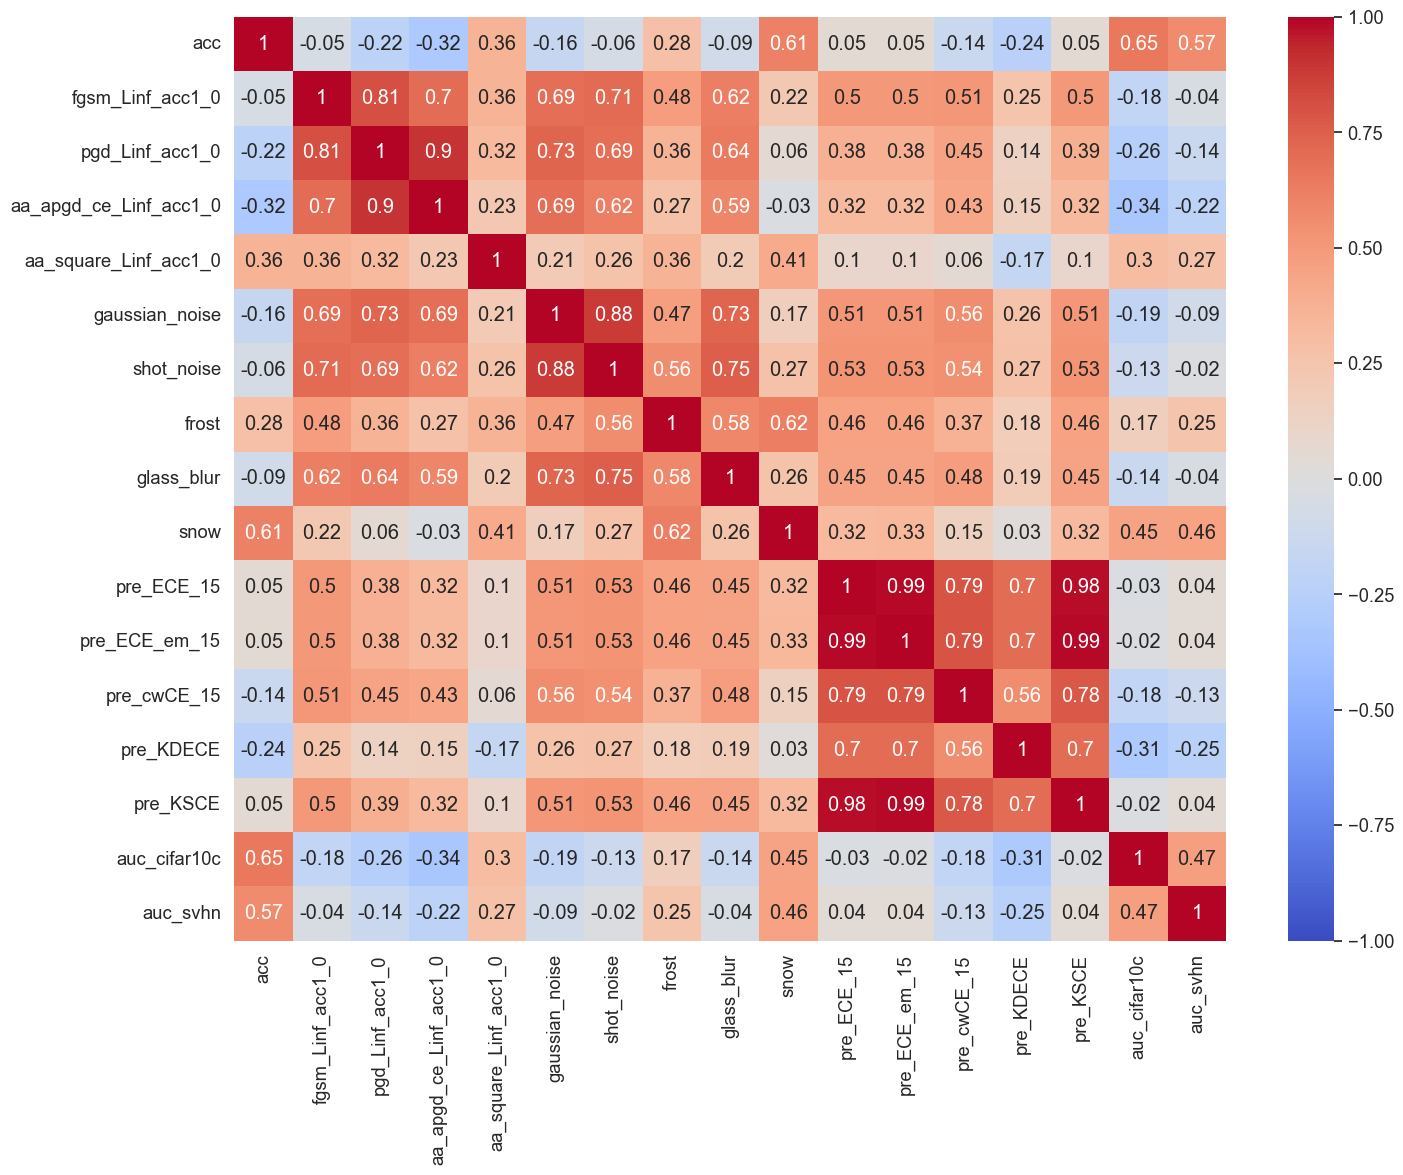

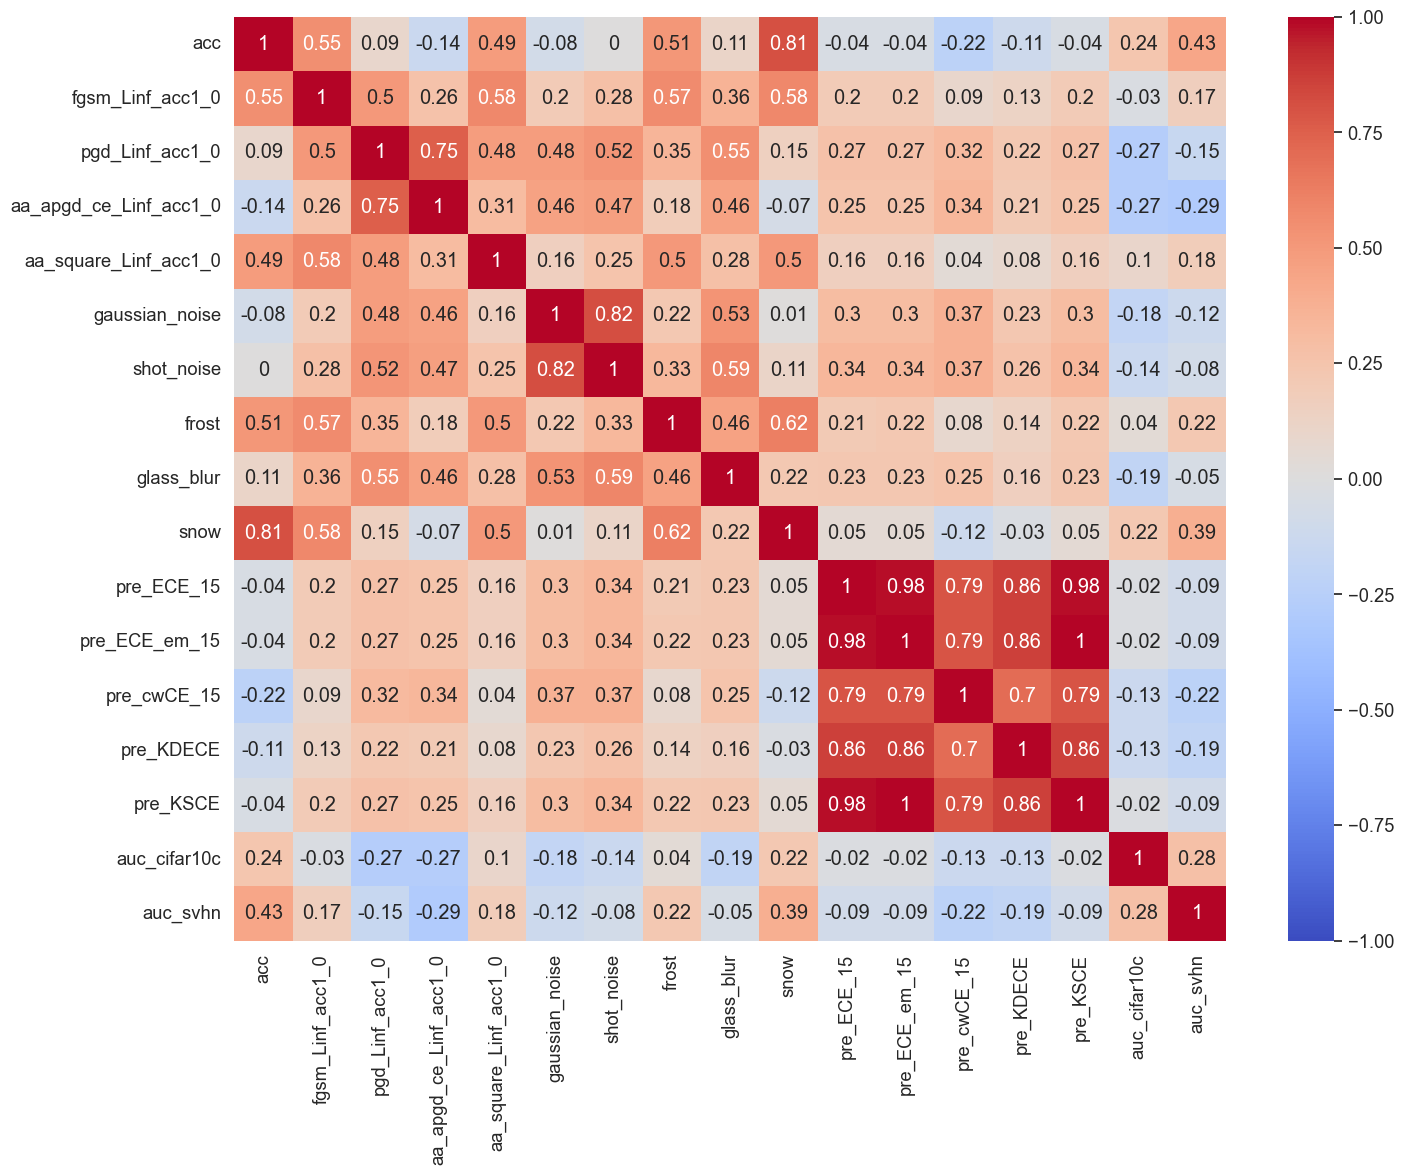

In [6]:
import pandas as pd

def create_heatmap(top_acc_points):
    cifar10_tss = pd.read_csv("./cifar10_tss.csv")
    cifar10_tss = cifar10_tss.sort_values('acc')
    cifar10_tss = cifar10_tss.head(top_acc_points)

    selected_cifar10_tss = cifar10_tss[
         ['acc', 'fgsm_Linf_acc1_0', 'pgd_Linf_acc1_0', "aa_apgd_ce_Linf_acc1_0", "aa_square_Linf_acc1_0", 'gaussian_noise',
     'shot_noise', 'frost', 'glass_blur', 'snow', 'pre_ECE_15', 'pre_ECE_em_15', 'pre_cwCE_15', 'pre_KDECE',
     'pre_KSCE','pre_auc_cifar10c', 'pre_auc_svhn']]

    kendall_matrix = selected_cifar10_tss.corr(method='kendall')
    kendall_matrix = np.round(kendall_matrix, 2)
    sns.set(font_scale=1.2)
    plt.figure(figsize=(16, 12))
    sns.heatmap(kendall_matrix.astype(float), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    # plt.title(f"Kendall Ranking Correlation Heatmap (Top {top_acc_points} Accuracy Points)")
    plt.savefig(f"cifar10_top{top_acc_points}acc.pdf", dpi=1000, format='pdf', bbox_inches='tight')
    plt.show()

# Call the function for different top accuracy points
create_heatmap(1000)
create_heatmap(5000)
create_heatmap(len(pd.read_csv("./cifar10_tss.csv")))

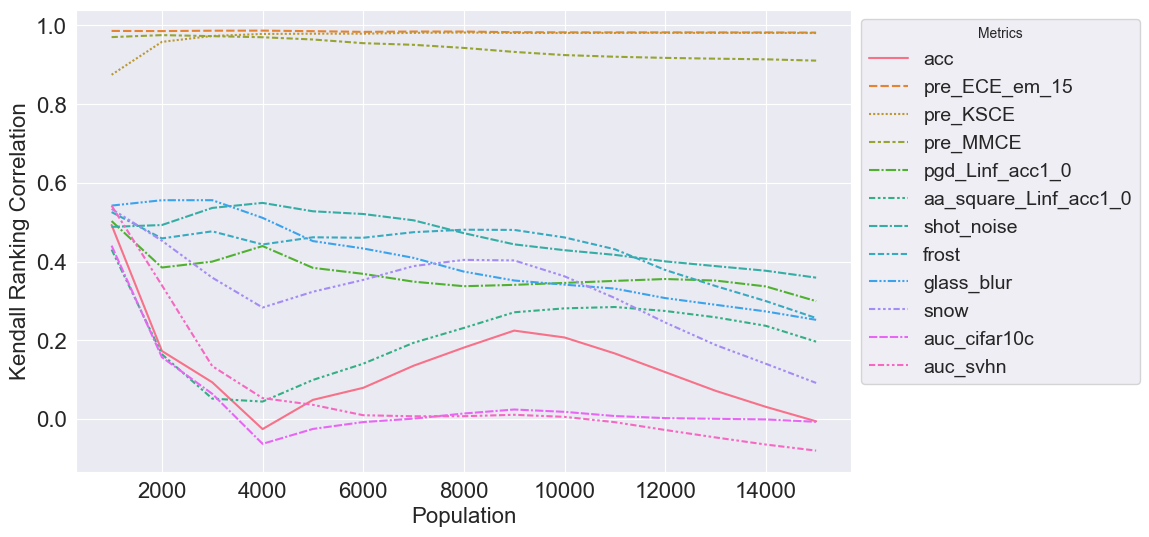

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cifar10_tss = pd.read_csv("./cifar10_tss.csv")
cifar10_tss = cifar10_tss.sort_values('acc')

columns_to_consider = ['acc', 'pre_ECE_em_15','pre_KSCE', 'pre_MMCE', 'pgd_Linf_acc1_0', "aa_square_Linf_acc1_0", 'shot_noise', 'frost', 'glass_blur', 'snow', 'auc_cifar10c', 'auc_svhn']

# Calculate Kendall rankings for different top accuracy points
top_accuracies = np.arange(1000, 15626, 1000)
kendall_rankings = []

for top_acc in top_accuracies:
    df = cifar10_tss.head(top_acc)
    selected_df = df[['pre_ECE_15'] + columns_to_consider]
    kendall_matrix = selected_df.corr(method='kendall')

    kendall_rankings.append(kendall_matrix.loc['pre_ECE_15', columns_to_consider].values)

kendall_rankings_df_ece = pd.DataFrame(kendall_rankings, columns=columns_to_consider, index=top_accuracies)
fontsize = 16
# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=kendall_rankings_df_ece)
plt.xlabel("Population", fontsize=fontsize)
plt.ylabel("Kendall Ranking Correlation", fontsize=fontsize)
plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)
# plt.title("Kendall Ranking vs. Top Accuracy Points")
plt.legend(title="Metrics", loc="upper left", bbox_to_anchor=(1, 1), fontsize=14)

plt.savefig("cifar10_ece_lineplot.pdf", dpi=1000, format='pdf', bbox_inches='tight')
plt.show()

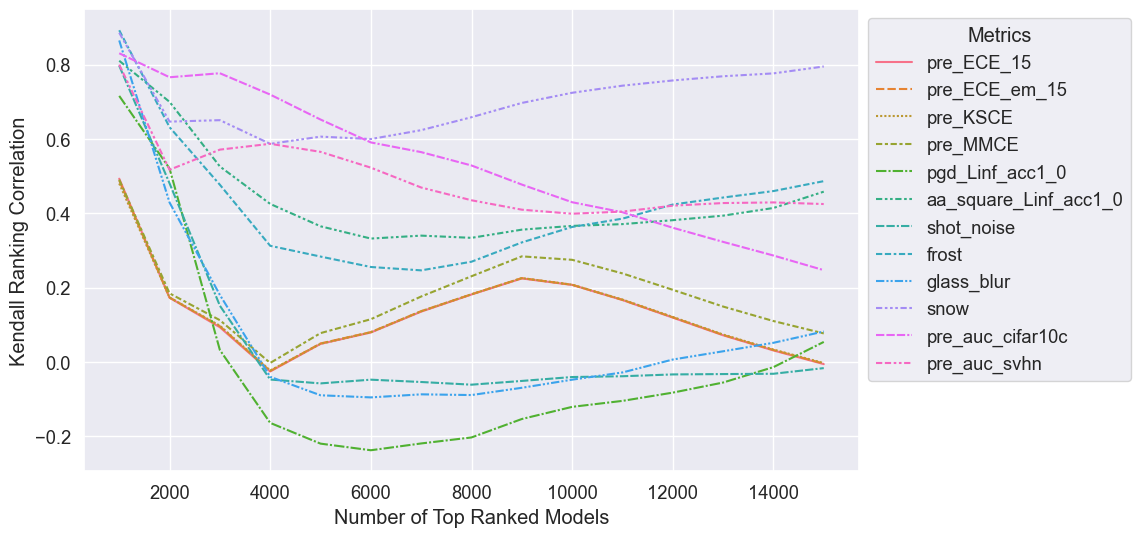

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cifar10_tss = pd.read_csv("./cifar10_tss.csv")
cifar10_tss = cifar10_tss.sort_values('acc')

columns_to_consider = ['pre_ECE_15', 'pre_ECE_em_15','pre_KSCE', 'pre_MMCE', 'pgd_Linf_acc1_0', "aa_square_Linf_acc1_0", 'shot_noise', 'frost', 'glass_blur', 'snow', 'pre_auc_cifar10c', 'pre_auc_svhn']

# Calculate Kendall rankings for different top accuracy points
top_accuracies = np.arange(1000, 15626, 1000)
kendall_rankings = []

for top_acc in top_accuracies:
    df = cifar10_tss.head(top_acc)
    selected_df = df[["acc"] + columns_to_consider]
    kendall_matrix = selected_df.corr(method='kendall')

    kendall_rankings.append(kendall_matrix.loc['acc', columns_to_consider].values)

kendall_rankings_df_acc = pd.DataFrame(kendall_rankings, columns=columns_to_consider, index=top_accuracies)

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=kendall_rankings_df_acc)
plt.xlabel("Number of Top Ranked Models")
plt.ylabel("Kendall Ranking Correlation")
# plt.title("Kendall Ranking vs. Top Accuracy Points")
plt.legend(title="Metrics", loc="upper left", bbox_to_anchor=(1, 1))
# plt.savefig("cifar10_acc_lineplot.pdf", dpi=1000, format='pdf', bbox_inches='tight')
plt.show()


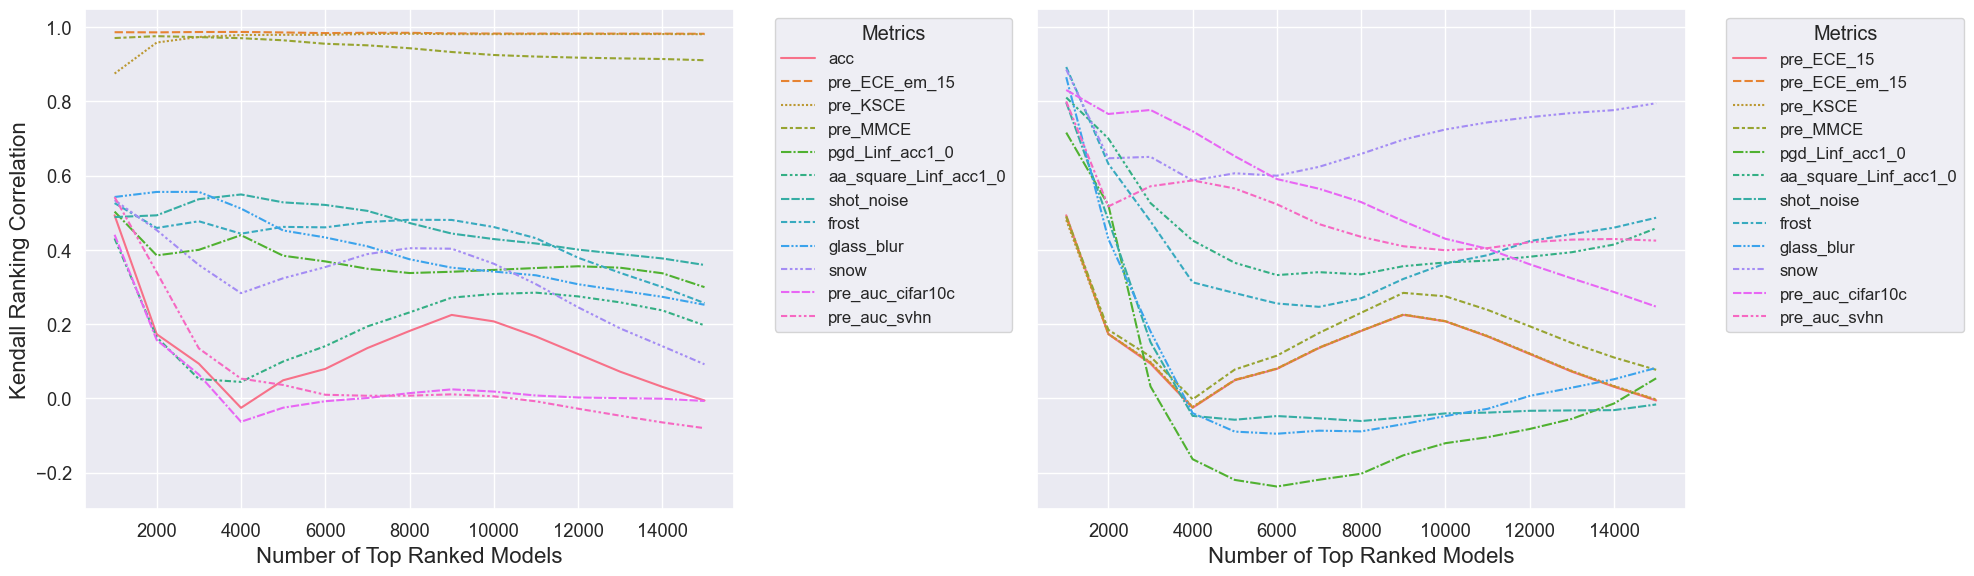

In [107]:
# Create a line plot using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

sns.lineplot(ax=axes[0], data=kendall_rankings_df_ece)
axes[0].set_xlabel("Number of Top Ranked Models", fontsize=16)
axes[0].set_ylabel("Kendall Ranking Correlation", fontsize=16)
axes[0].legend(title="Metrics", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')

sns.lineplot(ax=axes[1], data=kendall_rankings_df_acc)
axes[1].set_xlabel("Number of Top Ranked Models", fontsize=16)
axes[1].set_ylabel("Kendall Ranking Correlation", fontsize=16)
axes[1].legend(title="Metrics", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')

plt.tight_layout()
plt.savefig("cifar10_lineplot.pdf", dpi=1000, format='pdf', bbox_inches='tight')
plt.show()

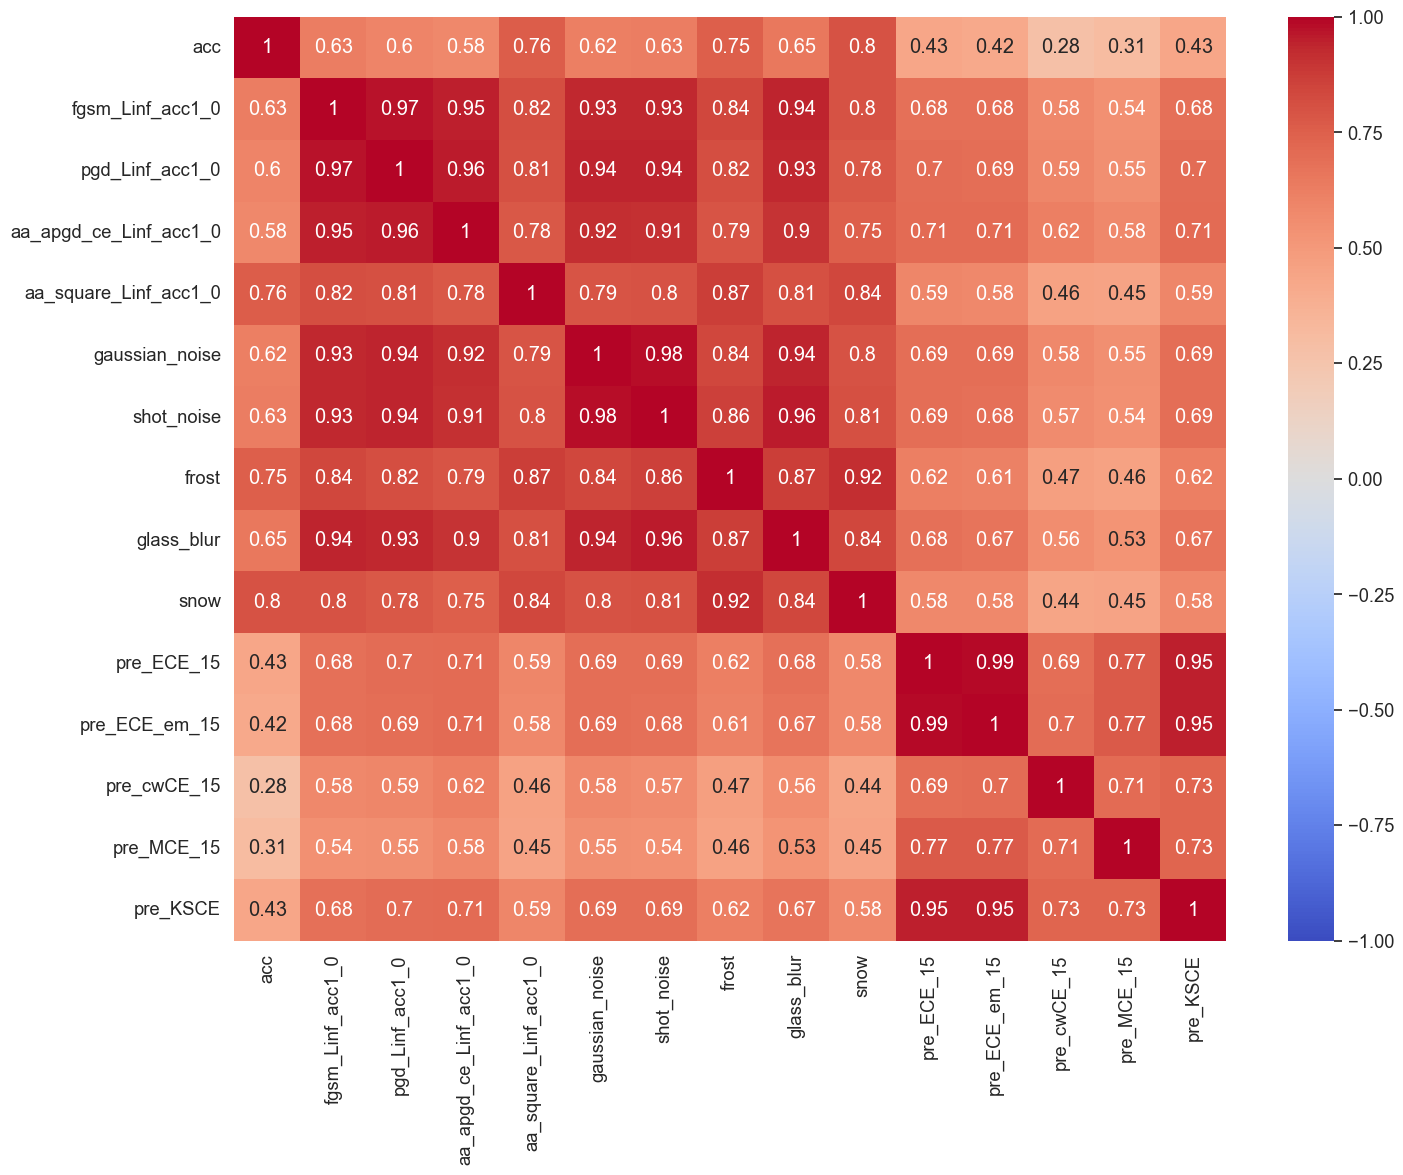

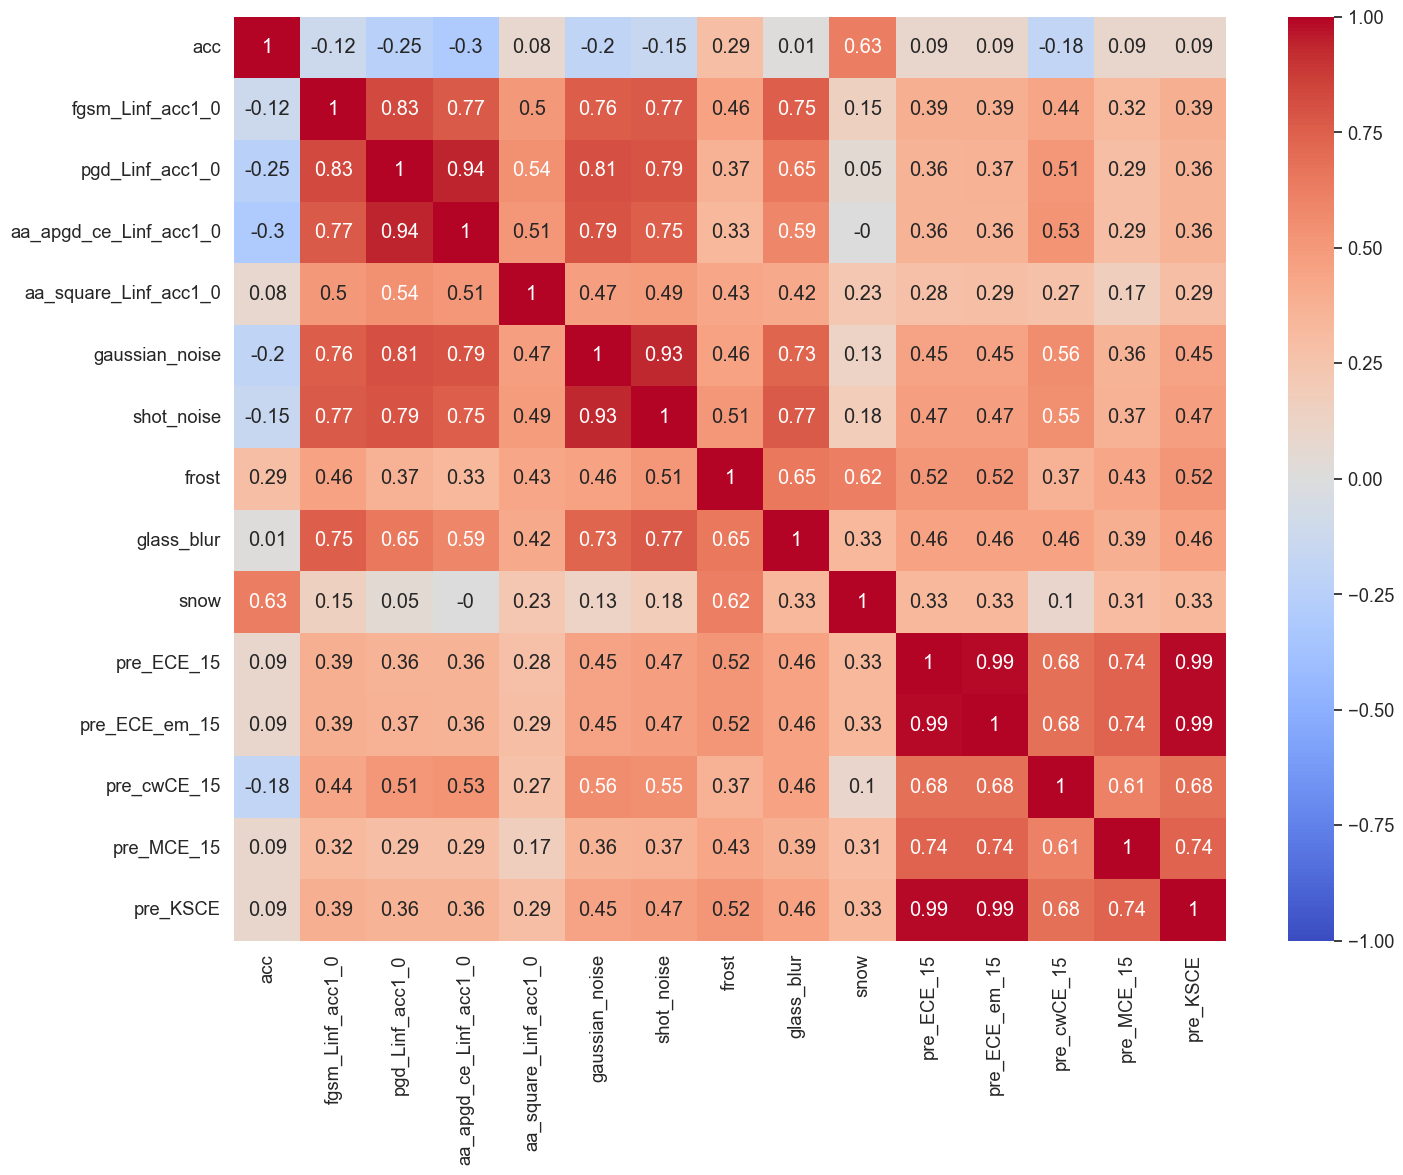

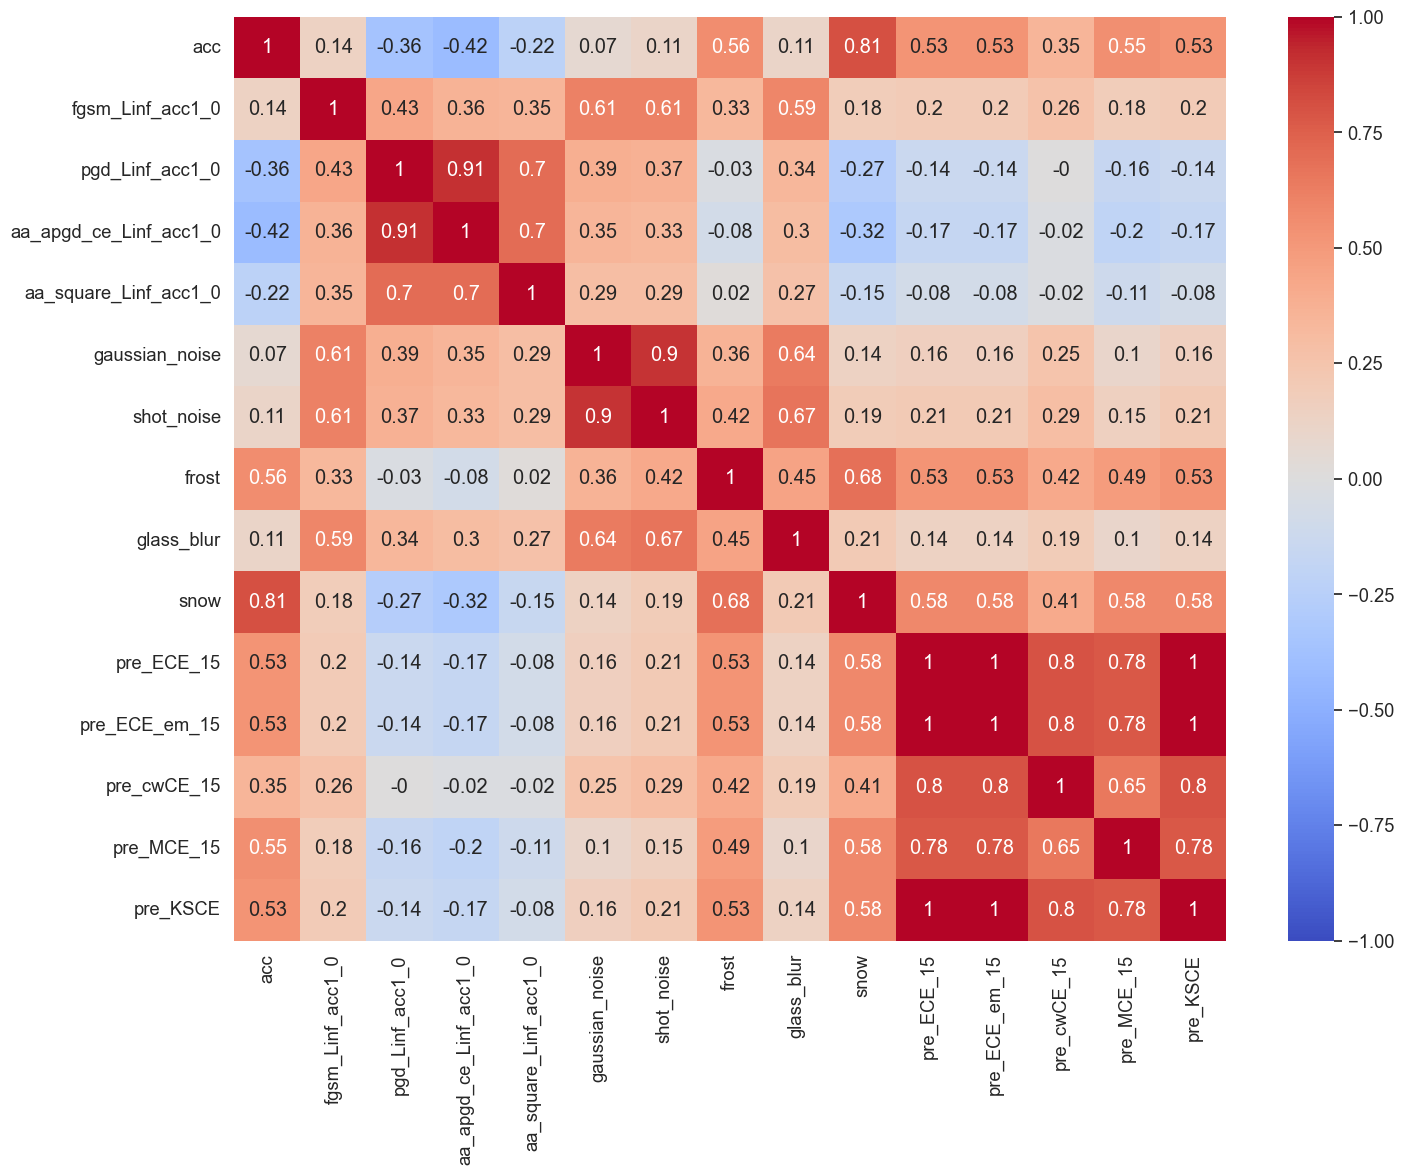

In [98]:
import pandas as pd

def create_heatmap(top_acc_points):
    cifar100_tss = pd.read_csv("./cifar100_tss.csv")
    cifar100_tss = cifar100_tss.sort_values('acc')
    cifar100_tss = cifar100_tss.head(top_acc_points)

    selected_cifar100_tss = cifar100_tss[
         ['acc', 'fgsm_Linf_acc1_0', 'pgd_Linf_acc1_0', "aa_apgd_ce_Linf_acc1_0", "aa_square_Linf_acc1_0", 'gaussian_noise',
     'shot_noise', 'frost', 'glass_blur', 'snow', 'pre_ECE_15', 'pre_ECE_em_15', 'pre_cwCE_15', 'pre_MCE_15',
     'pre_KSCE']]

    kendall_matrix = selected_cifar100_tss.corr(method='kendall')
    kendall_matrix = np.round(kendall_matrix, 2)
    sns.set(font_scale=1.2)
    plt.figure(figsize=(16, 12))
    sns.heatmap(kendall_matrix.astype(float), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    # plt.title(f"Kendall Ranking Correlation Heatmap (Top {top_acc_points} Accuracy Points)")
    plt.savefig(f"cifar100_top{top_acc_points}acc.pdf", dpi=1000, format='pdf', bbox_inches='tight')
    plt.show()

# Call the function for different top accuracy points
create_heatmap(1000)
create_heatmap(5000)
create_heatmap(len(pd.read_csv("./cifar100_tss.csv")))

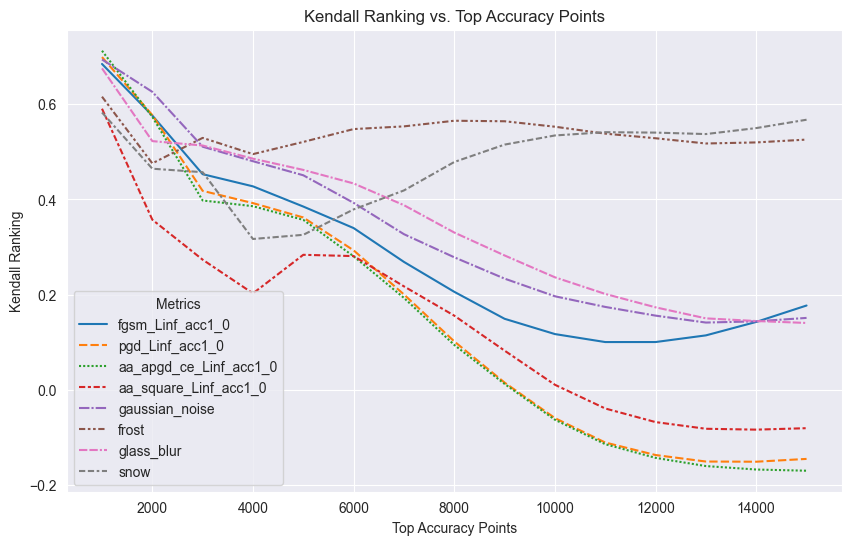

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cifar10_tss = pd.read_csv("./cifar100_tss.csv")
cifar10_tss = cifar10_tss.sort_values('acc')

columns_to_consider = ['fgsm_Linf_acc1_0', 'pgd_Linf_acc1_0', "aa_apgd_ce_Linf_acc1_0", "aa_square_Linf_acc1_0", 'gaussian_noise', 'frost', 'glass_blur', 'snow']

# Calculate Kendall rankings for different top accuracy points
top_accuracies = np.arange(1000, 15626, 1000)
kendall_rankings = []

for top_acc in top_accuracies:
    df = cifar10_tss.head(top_acc)
    selected_df = df[['pre_ECE_15'] + columns_to_consider]
    kendall_matrix = selected_df.corr(method='kendall')

    kendall_rankings.append(kendall_matrix.loc['pre_ECE_15', columns_to_consider].values)

kendall_rankings_df = pd.DataFrame(kendall_rankings, columns=columns_to_consider, index=top_accuracies)

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=kendall_rankings_df)
plt.xlabel("Top Accuracy Points")
plt.ylabel("Kendall Ranking")
plt.title("Kendall Ranking vs. Top Accuracy Points")
plt.legend(title="Metrics", loc="best")
plt.savefig("cifar100_ece_lineplot.pdf", dpi=1000, format='pdf', bbox_inches='tight')
plt.show()


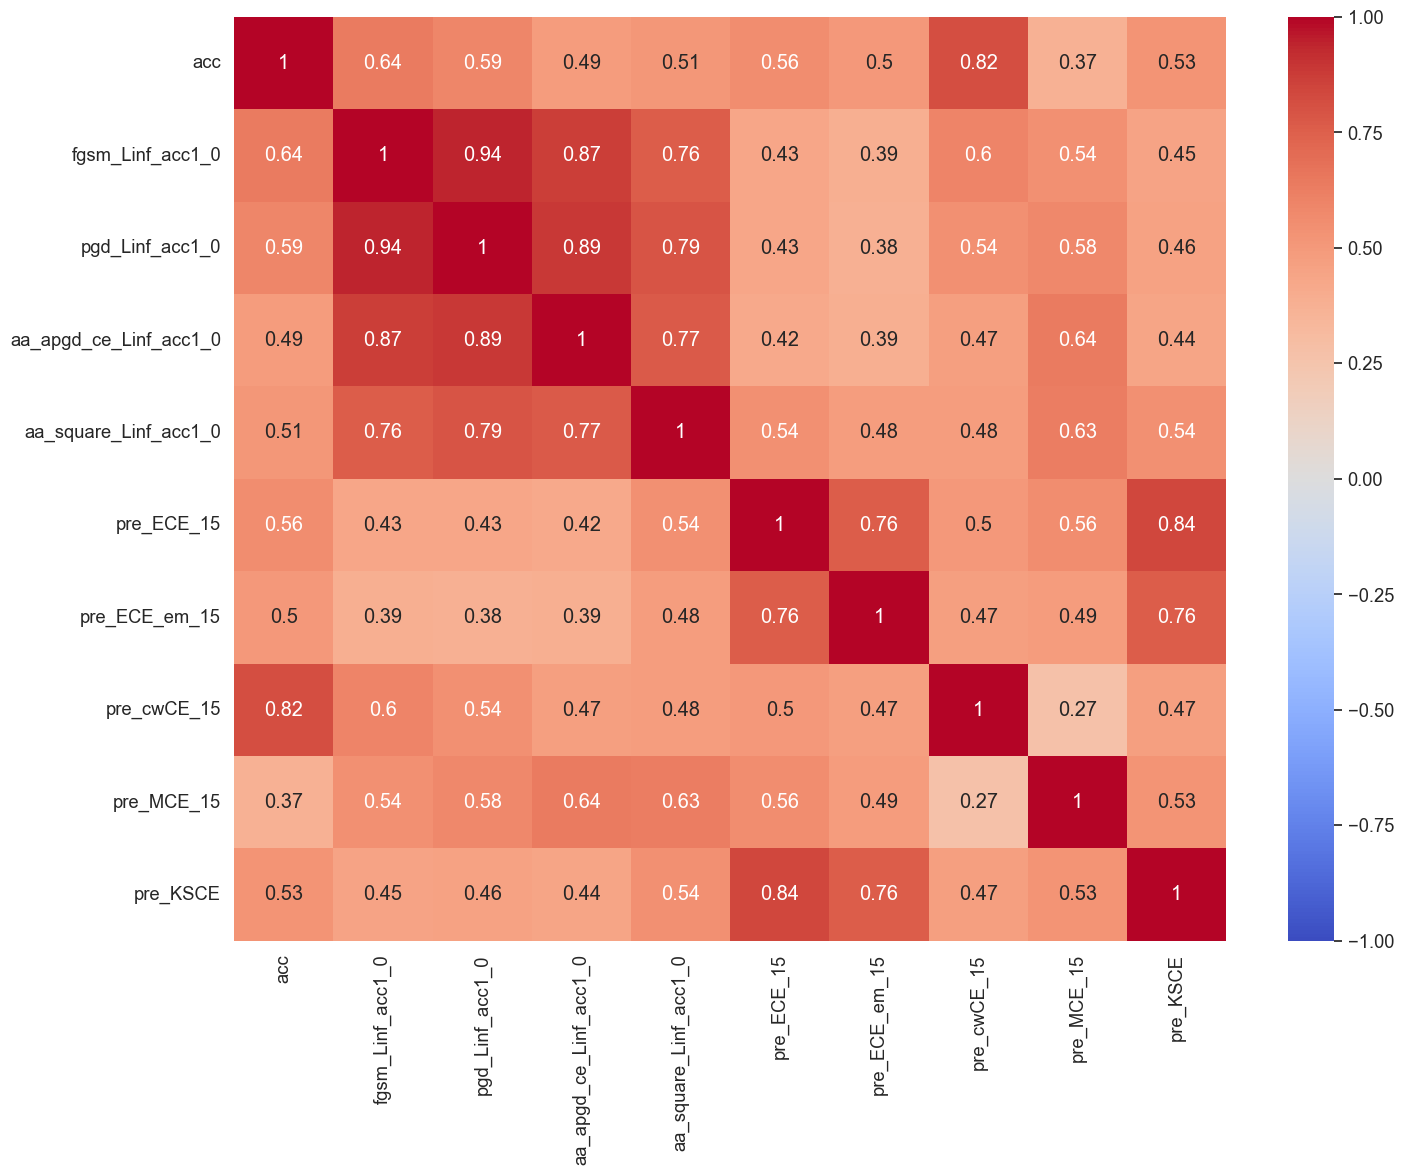

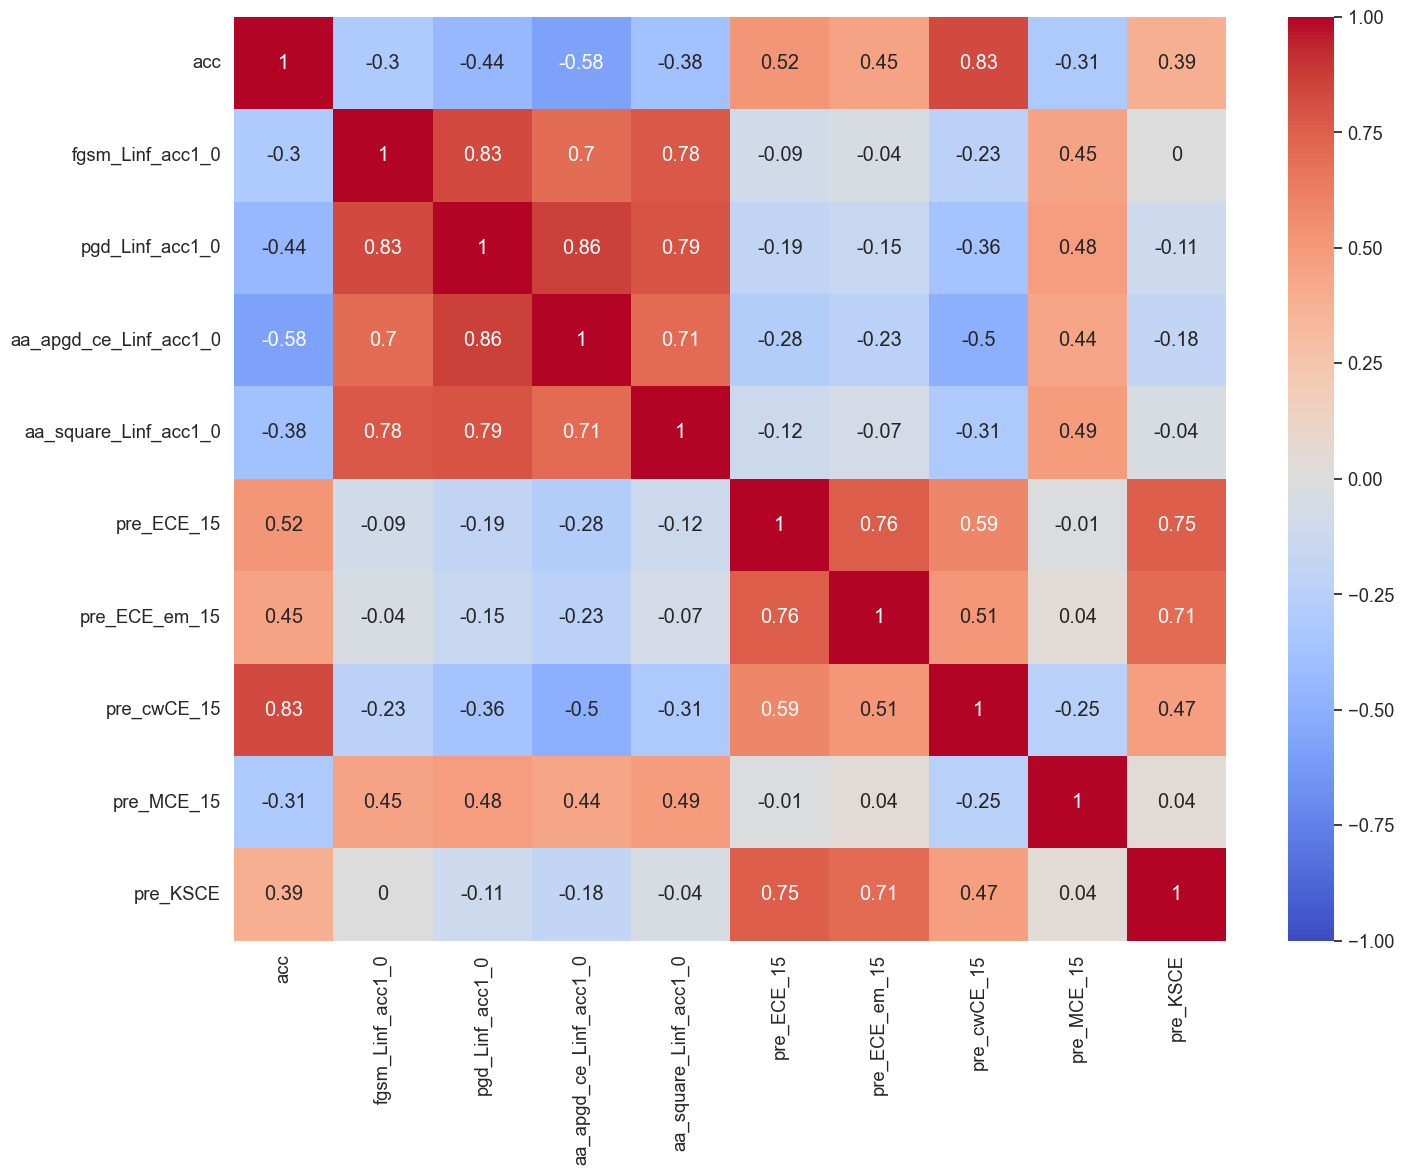

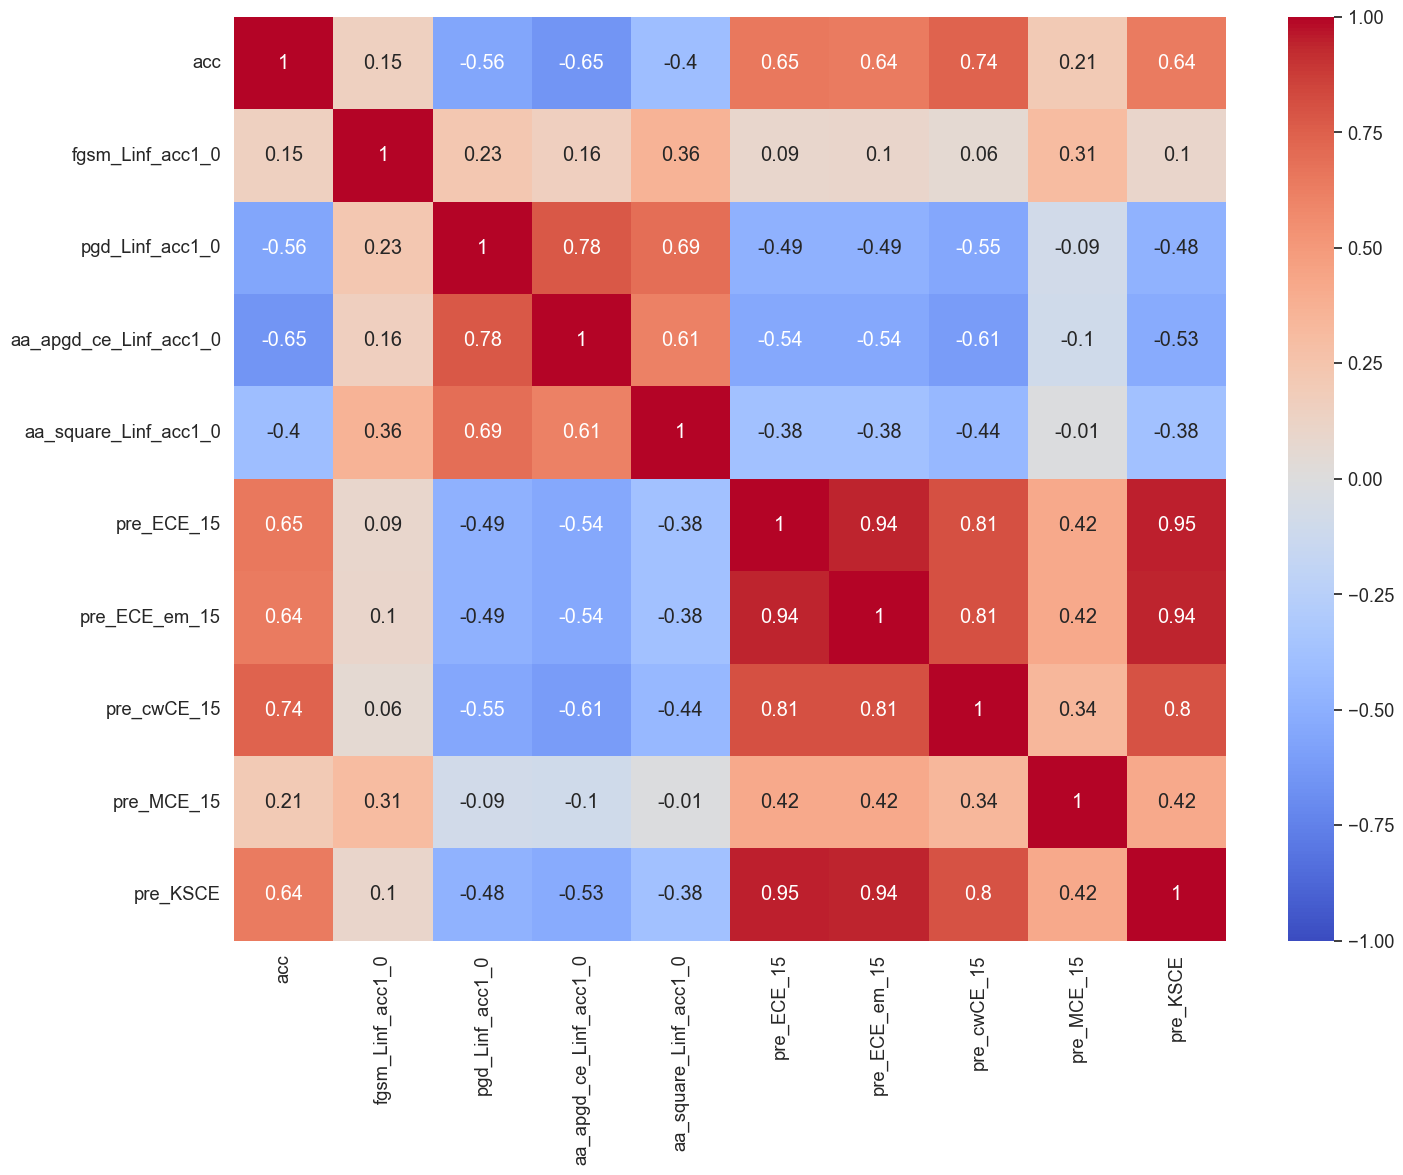

In [64]:
import pandas as pd

def create_heatmap(top_acc_points):
    ImageNet_tss = pd.read_csv("./ImageNet16_120_tss.csv")
    ImageNet_tss = ImageNet_tss.sort_values('acc')
    ImageNet_tss = ImageNet_tss.head(top_acc_points)

    selected_ImageNet_tss = ImageNet_tss[
        ['acc', 'fgsm_Linf_acc1_0', 'pgd_Linf_acc1_0', "aa_apgd_ce_Linf_acc1_0", "aa_square_Linf_acc1_0", 'pre_ECE_15', 'pre_ECE_em_15', 'pre_cwCE_15', 'pre_MCE_15',
         'pre_KSCE']]

    kendall_matrix = selected_ImageNet_tss.corr(method='kendall')
    kendall_matrix = np.round(kendall_matrix, 2)
    sns.set(font_scale=1.2)
    plt.figure(figsize=(16, 12))
    sns.heatmap(kendall_matrix.astype(float), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    # plt.title(f"Kendall Ranking Correlation Heatmap (Top {top_acc_points} Accuracy Points)")
    plt.savefig(f"ImageNet_top{top_acc_points}acc.pdf", dpi=1000, format='pdf', bbox_inches='tight')
    plt.show()

# Call the function for different top accuracy points
create_heatmap(1000)
create_heatmap(5000)
create_heatmap(len(pd.read_csv("./ImageNet16_120_tss.csv")))


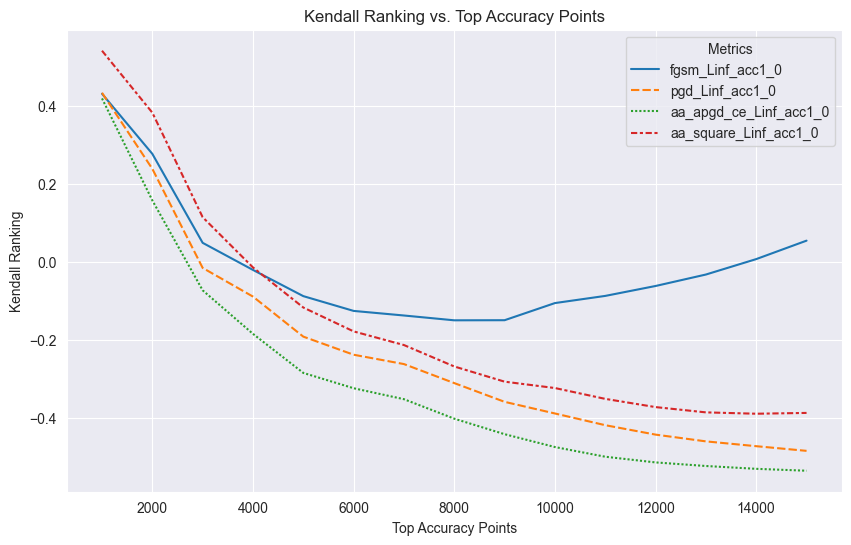

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cifar10_tss = pd.read_csv("./ImageNet16_120_tss.csv")
cifar10_tss = cifar10_tss.sort_values('acc')

columns_to_consider = ['fgsm_Linf_acc1_0', 'pgd_Linf_acc1_0', "aa_apgd_ce_Linf_acc1_0", "aa_square_Linf_acc1_0"]

# Calculate Kendall rankings for different top accuracy points
top_accuracies = np.arange(1000, 15626, 1000)
kendall_rankings = []

for top_acc in top_accuracies:
    df = cifar10_tss.head(top_acc)
    selected_df = df[['pre_ECE_15'] + columns_to_consider]
    kendall_matrix = selected_df.corr(method='kendall')

    kendall_rankings.append(kendall_matrix.loc['pre_ECE_15', columns_to_consider].values)

kendall_rankings_df = pd.DataFrame(kendall_rankings, columns=columns_to_consider, index=top_accuracies)

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=kendall_rankings_df)
plt.xlabel("Top Accuracy Points")
plt.ylabel("Kendall Ranking")
plt.title("Kendall Ranking vs. Top Accuracy Points")
plt.legend(title="Metrics", loc="best")
plt.savefig("ImageNet_ece_lineplot.pdf", dpi=1000, format='pdf', bbox_inches='tight')
plt.show()

In [13]:
from robustness_dataset import RobustnessDataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
data = RobustnessDataset()

In [14]:
tqdm = None
result_acc = data.query(
    tqdm = tqdm,
    measure = "accuracy",
    data = "cifar100"
)

robustness-dataset/cifar100/clean_accuracy.json
robustness-dataset/cifar100/aa_apgd-ce@Linf_accuracy.json
robustness-dataset/cifar100/aa_square@Linf_accuracy.json
robustness-dataset/cifar100/fgsm@Linf_accuracy.json
robustness-dataset/cifar100/pgd@Linf_accuracy.json
robustness-dataset/cifar100/brightness_accuracy.json
robustness-dataset/cifar100/contrast_accuracy.json
robustness-dataset/cifar100/defocus_blur_accuracy.json
robustness-dataset/cifar100/elastic_transform_accuracy.json
robustness-dataset/cifar100/fog_accuracy.json
robustness-dataset/cifar100/frost_accuracy.json
robustness-dataset/cifar100/gaussian_noise_accuracy.json
robustness-dataset/cifar100/glass_blur_accuracy.json
robustness-dataset/cifar100/impulse_noise_accuracy.json
robustness-dataset/cifar100/jpeg_compression_accuracy.json
robustness-dataset/cifar100/motion_blur_accuracy.json
robustness-dataset/cifar100/pixelate_accuracy.json
robustness-dataset/cifar100/shot_noise_accuracy.json
robustness-dataset/cifar100/snow_accur

In [32]:
tqdm = None
result_confidence = data.query(
    tqdm = tqdm,
    measure = "confidence",
    data = "cifar10",
    key = 'clean'
)

robustness-dataset/cifar10/clean_confidence.json
robustness-dataset/cifar10/aa_apgd-ce@Linf_confidence.json
robustness-dataset/cifar10/aa_square@Linf_confidence.json
robustness-dataset/cifar10/fgsm@Linf_confidence.json
robustness-dataset/cifar10/pgd@Linf_confidence.json
robustness-dataset/cifar10/brightness_confidence.json
robustness-dataset/cifar10/contrast_confidence.json
robustness-dataset/cifar10/defocus_blur_confidence.json
robustness-dataset/cifar10/elastic_transform_confidence.json
robustness-dataset/cifar10/fog_confidence.json
robustness-dataset/cifar10/frost_confidence.json
robustness-dataset/cifar10/gaussian_noise_confidence.json
robustness-dataset/cifar10/glass_blur_confidence.json
robustness-dataset/cifar10/impulse_noise_confidence.json
robustness-dataset/cifar10/jpeg_compression_confidence.json
robustness-dataset/cifar10/motion_blur_confidence.json
robustness-dataset/cifar10/pixelate_confidence.json
robustness-dataset/cifar10/shot_noise_confidence.json
robustness-dataset/c

In [42]:
confs = []
data = RobustnessDataset()
# print(len(result_confidence["cifar10"]["clean"]["confidence"]))
for i in range(15625):
    i = str(i)
    try:
        correct_confidence = result_confidence["cifar10"]["clean"]["confidence"][i]['prediction'][0]
        incorrect_confidence = result_confidence["cifar10"]["clean"]["confidence"][i]['prediction'][1]
    except Exception:
        i = str(data.get_uid(i))
        correct_confidence = result_confidence["cifar10"]["clean"]["confidence"][i]['prediction'][0]
        incorrect_confidence = result_confidence["cifar10"]["clean"]["confidence"][i]['prediction'][1]
    confs.append([correct_confidence, incorrect_confidence])
df_confs_cifar10 = pd.DataFrame(confs, columns=['correct_confidence', 'incorrect_confidence'])
print(df_confs_cifar10)

       correct_confidence  incorrect_confidence
0                   0.934                 0.675
1                   0.988                 0.867
2                   0.930                 0.675
3                   0.916                 0.648
4                   0.933                 0.672
...                   ...                   ...
15620               0.916                 0.640
15621               0.964                 0.760
15622               0.987                 0.832
15623               0.805                 0.579
15624               0.925                 0.669

[15625 rows x 2 columns]


In [ ]:
tqdm = None
result_confidence = data.query(
    tqdm = tqdm,
    measure = "confidence",
    data = "cifar100",
    key = "clean"
)

In [ ]:
confs = []
data = RobustnessDataset()
# print(len(result_confidence["cifar10"]["clean"]["confidence"]))
for i in range(15625):
    i = str(i)
    try:
        correct_confidence = result_confidence["cifar10"]["clean"]["confidence"][i]['prediction'][0]
        incorrect_confidence = result_confidence["cifar10"]["clean"]["confidence"][i]['prediction'][1]
    except Exception:
        i = str(data.get_uid(i))
        correct_confidence = result_confidence["cifar10"]["clean"]["confidence"][i]['prediction'][0]
        incorrect_confidence = result_confidence["cifar10"]["clean"]["confidence"][i]['prediction'][1]
    confs.append([correct_confidence, incorrect_confidence])
df_confs_cifar100 = pd.DataFrame(confs, columns=['correct_confidence', 'incorrect_confidence'])
print(df_confs_cifar100)

In [15]:
import pandas as pd
clean_acc = []
fgsm_Linf_acc = []
pgd_Linf_acc = []
aa_apgd_ce_Linf_acc = []
aa_square_Linf_acc = []
adversial_attack = ["clean", "fgsm@Linf", "pgd@Linf", "aa_apgd-ce@Linf", "aa_square@Linf"]
corruption = ['brightness','contrast','defocus_blur','elastic_transform','fog','frost','gaussian_noise','glass_blur','impulse_noise','jpeg_compression', 'motion_blur','pixelate','shot_noise','snow','zoom_blur']
brightness = []
contrast = []
defocus_blur = []
elastic_transform = []
fog=[]
frost=[]
gaussian_noise=[]
glass_blur=[]
impulse_noise=[]
jpeg_compression=[]
motion_blur=[]
pixelate=[]
shot_noise=[]
snow=[]
zoom_blur=[]
overall_attack = adversial_attack + corruption
print(overall_attack)
i = 0
for attack in overall_attack:
    for idx in range(15625):
        acc = result_acc['cifar100'][attack]["accuracy"][data.get_uid(idx)]
        if attack == "clean":
            clean_acc.append(acc)
        elif attack == "fgsm@Linf":
            fgsm_Linf_acc.append(acc)
        elif attack == "pgd@Linf":
            pgd_Linf_acc.append(acc)
        elif attack == "aa_apgd-ce@Linf":
            aa_apgd_ce_Linf_acc.append(acc)
        elif attack == "aa_square@Linf":
            aa_square_Linf_acc.append(acc)
        if attack in corruption:
            acc = result_acc['cifar100'][attack]["accuracy"][data.get_uid(idx)][2]
            if i == 0:
                brightness.append(acc)
            elif i == 1:
                contrast.append(acc)
            elif i == 2:
                defocus_blur.append(acc)
            elif i == 3:
                elastic_transform.append(acc)
            elif i == 4:
                fog.append(acc)
            elif i == 5:
                frost.append(acc)
            elif i == 6:
                gaussian_noise.append(acc)
            elif i == 7:
                glass_blur.append(acc)
            elif i == 8:
                impulse_noise.append(acc)
            elif i == 9:
                jpeg_compression.append(acc)
            elif i == 10:
                motion_blur.append(acc)
            elif i == 11:
                pixelate.append(acc)
            elif i == 12:
                shot_noise.append(acc)
            elif i == 13:
                snow.append(acc)
            elif i == 14:
                zoom_blur.append(acc)
    if attack in corruption:
        i+=1
# print(brightness)
df = pd.DataFrame(zip(clean_acc, fgsm_Linf_acc, pgd_Linf_acc, aa_apgd_ce_Linf_acc, aa_square_Linf_acc))
df_corruption = pd.DataFrame(zip(brightness, contrast, defocus_blur,elastic_transform, fog, frost, gaussian_noise,
                                 glass_blur, impulse_noise, jpeg_compression, motion_blur, pixelate, shot_noise,
                                 snow, zoom_blur))
print(df)
print(df_corruption)
# df.to_csv("attack_acc.csv")

['clean', 'fgsm@Linf', 'pgd@Linf', 'aa_apgd-ce@Linf', 'aa_square@Linf', 'brightness', 'contrast', 'defocus_blur', 'elastic_transform', 'fog', 'frost', 'gaussian_noise', 'glass_blur', 'impulse_noise', 'jpeg_compression', 'motion_blur', 'pixelate', 'shot_noise', 'snow', 'zoom_blur']
           0                                                  1  \
0      0.519  [0.453, 0.239, 0.119, 0.052, 0.038, 0.033, 0.0...   
1      0.706  [0.577, 0.282, 0.178, 0.123, 0.105, 0.094, 0.0...   
2      0.545  [0.495, 0.316, 0.183, 0.079, 0.043, 0.029, 0.0...   
3      0.580  [0.52, 0.309, 0.159, 0.05, 0.025, 0.016, 0.011...   
4      0.600  [0.52, 0.273, 0.134, 0.054, 0.034, 0.024, 0.01...   
...      ...                                                ...   
15620  0.581  [0.513, 0.296, 0.154, 0.054, 0.031, 0.021, 0.0...   
15621  0.625  [0.544, 0.302, 0.159, 0.065, 0.044, 0.036, 0.0...   
15622  0.692  [0.572, 0.303, 0.198, 0.14, 0.12, 0.112, 0.104...   
15623  0.403  [0.386, 0.322, 0.256, 0.154, 0.097

In [16]:
df_corruption.columns = corruption
df_corruption.to_csv("corruption_acc_cifar100.csv", index=False)
print(df_corruption)

       brightness  contrast  defocus_blur  elastic_transform    fog  frost  \
0           0.346     0.074         0.176              0.186  0.122  0.144   
1           0.594     0.266         0.413              0.384  0.394  0.265   
2           0.400     0.104         0.259              0.257  0.173  0.172   
3           0.425     0.106         0.260              0.260  0.182  0.192   
4           0.451     0.119         0.295              0.284  0.196  0.207   
...           ...       ...           ...                ...    ...    ...   
15620       0.414     0.094         0.258              0.256  0.170  0.170   
15621       0.484     0.149         0.315              0.310  0.242  0.206   
15622       0.574     0.258         0.417              0.390  0.377  0.261   
15623       0.243     0.042         0.214              0.200  0.073  0.154   
15624       0.362     0.103         0.207              0.205  0.157  0.143   

       gaussian_noise  glass_blur  impulse_noise  jpeg_compress

In [17]:
df.columns = ['clean_acc', 'fgsm_Linf_acc','pgd_Linf_acc', 'aa_apgd_ce_Linf_acc', 'aa_square_Linf_acc']
# 使用apply(pd.Series)方法将列表列拆分成多列
attack = ["fgsm@Linf", "pgd@Linf", "aa_apgd-ce@Linf", "aa_square@Linf"]
no = 0
for attack_acc in ['fgsm_Linf_acc','pgd_Linf_acc', 'aa_apgd_ce_Linf_acc', 'aa_square_Linf_acc']:
    new_columns = df[attack_acc].apply(pd.Series)
    print(data.meta["epsilons"][attack[no]])
    ls_name = []
    for epsilon in data.meta["epsilons"][attack[no]]:
        epsilon = str(epsilon).replace(".", "_")
        ls_name.append(attack_acc + epsilon)
    print(ls_name)
    new_columns.columns = ls_name
    # 将新列添加到原始DataFrame中
    df = pd.concat([df, new_columns], axis=1)
    # 删除原始的列表列
    df.drop(attack_acc, axis=1, inplace=True)
    no += 1
print(df)
df.to_csv("attack_acc_cifar100.csv", index=False)

[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 255.0]
['fgsm_Linf_acc0_1', 'fgsm_Linf_acc0_5', 'fgsm_Linf_acc1_0', 'fgsm_Linf_acc2_0', 'fgsm_Linf_acc3_0', 'fgsm_Linf_acc4_0', 'fgsm_Linf_acc5_0', 'fgsm_Linf_acc6_0', 'fgsm_Linf_acc7_0', 'fgsm_Linf_acc8_0', 'fgsm_Linf_acc255_0']
[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]
['pgd_Linf_acc0_1', 'pgd_Linf_acc0_5', 'pgd_Linf_acc1_0', 'pgd_Linf_acc2_0', 'pgd_Linf_acc3_0', 'pgd_Linf_acc4_0', 'pgd_Linf_acc8_0']
[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]
['aa_apgd_ce_Linf_acc0_1', 'aa_apgd_ce_Linf_acc0_5', 'aa_apgd_ce_Linf_acc1_0', 'aa_apgd_ce_Linf_acc2_0', 'aa_apgd_ce_Linf_acc3_0', 'aa_apgd_ce_Linf_acc4_0', 'aa_apgd_ce_Linf_acc8_0']
[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]
['aa_square_Linf_acc0_1', 'aa_square_Linf_acc0_5', 'aa_square_Linf_acc1_0', 'aa_square_Linf_acc2_0', 'aa_square_Linf_acc3_0', 'aa_square_Linf_acc4_0', 'aa_square_Linf_acc8_0']
       clean_acc  fgsm_Linf_acc0_1  fgsm_Linf_acc0_5  fgsm_Linf_acc1_0  \
0          0.519             0.453          

In [29]:
from robustness_dataset import RobustnessDataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

data = RobustnessDataset()
tqdm = None
result_acc = data.query(
    tqdm=tqdm,
    measure="accuracy",
    data="ImageNet16-120"
)
print(result_acc["ImageNet16-120"]['clean']['accuracy'])

robustness-dataset/ImageNet16-120/clean_accuracy.json
robustness-dataset/ImageNet16-120/aa_apgd-ce@Linf_accuracy.json
robustness-dataset/ImageNet16-120/aa_square@Linf_accuracy.json
robustness-dataset/ImageNet16-120/fgsm@Linf_accuracy.json
robustness-dataset/ImageNet16-120/pgd@Linf_accuracy.json
{'0': 0.277, '1': 0.451, '2': 0.276, '3': 0.289, '4': 0.314, '5': 0.385, '6': 0.392, '7': 0.396, '8': 0.412, '9': 0.292, '10': 0.008, '11': 0.294, '12': 0.008, '13': 0.38, '14': 0.384, '15': 0.133, '16': 0.428, '17': 0.365, '18': 0.378, '19': 0.301, '20': 0.343, '21': 0.424, '22': 0.357, '23': 0.36, '24': 0.281, '26': 0.38, '27': 0.363, '28': 0.277, '31': 0.363, '32': 0.425, '33': 0.42, '34': 0.384, '35': 0.385, '36': 0.381, '37': 0.345, '38': 0.341, '39': 0.344, '40': 0.162, '41': 0.32, '42': 0.439, '43': 0.392, '44': 0.18, '45': 0.341, '46': 0.375, '47': 0.366, '48': 0.289, '49': 0.377, '50': 0.453, '51': 0.302, '52': 0.44, '53': 0.115, '54': 0.391, '55': 0.287, '56': 0.429, '57': 0.163, '58':

In [31]:
clean_acc = []
fgsm_Linf_acc = []
pgd_Linf_acc = []
aa_apgd_ce_Linf_acc = []
aa_square_Linf_acc = []
adversial_attack = ["clean", "fgsm@Linf", "pgd@Linf", "aa_apgd-ce@Linf", "aa_square@Linf"]
corruption = ['brightness', 'contrast', 'defocus_blur', 'elastic_transform', 'fog', 'frost', 'gaussian_noise',
              'glass_blur', 'impulse_noise', 'jpeg_compression', 'motion_blur', 'pixelate', 'shot_noise', 'snow',
              'zoom_blur']
brightness = []
contrast = []
defocus_blur = []
elastic_transform = []
fog = []
frost = []
gaussian_noise = []
glass_blur = []
impulse_noise = []
jpeg_compression = []
motion_blur = []
pixelate = []
shot_noise = []
snow = []
zoom_blur = []
overall_attack = adversial_attack
print(overall_attack)
i = 0
for attack in overall_attack:
    for idx in range(15625):
        acc = result_acc["ImageNet16-120"][attack]["accuracy"][data.get_uid(idx)]
        if attack == "clean":
            clean_acc.append(acc)
        elif attack == "fgsm@Linf":
            fgsm_Linf_acc.append(acc)
        elif attack == "pgd@Linf":
            pgd_Linf_acc.append(acc)
        elif attack == "aa_apgd-ce@Linf":
            aa_apgd_ce_Linf_acc.append(acc)
        elif attack == "aa_square@Linf":
            aa_square_Linf_acc.append(acc)
        if attack in corruption:
            acc = result_acc["ImageNet16-120"][attack]["accuracy"][data.get_uid(idx)][2]
            if i == 0:
                brightness.append(acc)
            elif i == 1:
                contrast.append(acc)
            elif i == 2:
                defocus_blur.append(acc)
            elif i == 3:
                elastic_transform.append(acc)
            elif i == 4:
                fog.append(acc)
            elif i == 5:
                frost.append(acc)
            elif i == 6:
                gaussian_noise.append(acc)
            elif i == 7:
                glass_blur.append(acc)
            elif i == 8:
                impulse_noise.append(acc)
            elif i == 9:
                jpeg_compression.append(acc)
            elif i == 10:
                motion_blur.append(acc)
            elif i == 11:
                pixelate.append(acc)
            elif i == 12:
                shot_noise.append(acc)
            elif i == 13:
                snow.append(acc)
            elif i == 14:
                zoom_blur.append(acc)
    if attack in corruption:
        i += 1
# print(brightness)
df = pd.DataFrame(zip(clean_acc, fgsm_Linf_acc, pgd_Linf_acc, aa_apgd_ce_Linf_acc, aa_square_Linf_acc))
# df_corruption = pd.DataFrame(zip(brightness, contrast, defocus_blur, elastic_transform, fog, frost, gaussian_noise,
#                                  glass_blur, impulse_noise, jpeg_compression, motion_blur, pixelate, shot_noise,
#                                  snow, zoom_blur))
# print(df)
# print(df_corruption)
# # df.to_csv("attack_acc.csv")
# df_corruption.columns = corruption
# df_corruption.to_csv("corruption_acc_imagenet.csv", index=False)
# print(df_corruption)
df.columns = ['clean_acc', 'fgsm_Linf_acc', 'pgd_Linf_acc', 'aa_apgd_ce_Linf_acc', 'aa_square_Linf_acc']
# 使用apply(pd.Series)方法将列表列拆分成多列
attack = ["fgsm@Linf", "pgd@Linf", "aa_apgd-ce@Linf", "aa_square@Linf"]
no = 0
for attack_acc in ['fgsm_Linf_acc', 'pgd_Linf_acc', 'aa_apgd_ce_Linf_acc', 'aa_square_Linf_acc']:
    new_columns = df[attack_acc].apply(pd.Series)
    print(data.meta["epsilons"][attack[no]])
    ls_name = []
    for epsilon in data.meta["epsilons"][attack[no]]:
        epsilon = str(epsilon).replace(".", "_")
        ls_name.append(attack_acc + epsilon)
    print(ls_name)
    new_columns.columns = ls_name
    # 将新列添加到原始DataFrame中
    df = pd.concat([df, new_columns], axis=1)
    # 删除原始的列表列
    df.drop(attack_acc, axis=1, inplace=True)
    no += 1
print(df)
df.to_csv("attack_acc_imagenet.csv", index=False)

['clean', 'fgsm@Linf', 'pgd@Linf', 'aa_apgd-ce@Linf', 'aa_square@Linf']
[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 255.0]
['fgsm_Linf_acc0_1', 'fgsm_Linf_acc0_5', 'fgsm_Linf_acc1_0', 'fgsm_Linf_acc2_0', 'fgsm_Linf_acc3_0', 'fgsm_Linf_acc4_0', 'fgsm_Linf_acc5_0', 'fgsm_Linf_acc6_0', 'fgsm_Linf_acc7_0', 'fgsm_Linf_acc8_0', 'fgsm_Linf_acc255_0']
[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]
['pgd_Linf_acc0_1', 'pgd_Linf_acc0_5', 'pgd_Linf_acc1_0', 'pgd_Linf_acc2_0', 'pgd_Linf_acc3_0', 'pgd_Linf_acc4_0', 'pgd_Linf_acc8_0']
[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]
['aa_apgd_ce_Linf_acc0_1', 'aa_apgd_ce_Linf_acc0_5', 'aa_apgd_ce_Linf_acc1_0', 'aa_apgd_ce_Linf_acc2_0', 'aa_apgd_ce_Linf_acc3_0', 'aa_apgd_ce_Linf_acc4_0', 'aa_apgd_ce_Linf_acc8_0']
[0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 8.0]
['aa_square_Linf_acc0_1', 'aa_square_Linf_acc0_5', 'aa_square_Linf_acc1_0', 'aa_square_Linf_acc2_0', 'aa_square_Linf_acc3_0', 'aa_square_Linf_acc4_0', 'aa_square_Linf_acc8_0']
       clean_acc  fgsm_Linf_acc0_1  fgsm_Linf_

In [19]:
# df_imagenet = pd.read_csv('./archive_results/imagenet_results.csv')
# df_cifar10 = pd.read_csv('./cifar10_full.csv')
# df_cifar100 = pd.read_csv('./archive_results/cifar100_results.csv')
df_cifar100_robustness = pd.read_csv('./attack_acc_cifar100.csv')
df_cifar100_corruption = pd.read_csv('./corruption_acc_cifar100.csv')
print(df_cifar100_robustness.columns)
print(df_cifar10_corruption.columns)
# print(df_cifar10.columns)

Index(['clean_acc', 'fgsm_Linf_acc0_1', 'fgsm_Linf_acc0_5', 'fgsm_Linf_acc1_0',
       'fgsm_Linf_acc2_0', 'fgsm_Linf_acc3_0', 'fgsm_Linf_acc4_0',
       'fgsm_Linf_acc5_0', 'fgsm_Linf_acc6_0', 'fgsm_Linf_acc7_0',
       'fgsm_Linf_acc8_0', 'fgsm_Linf_acc255_0', 'pgd_Linf_acc0_1',
       'pgd_Linf_acc0_5', 'pgd_Linf_acc1_0', 'pgd_Linf_acc2_0',
       'pgd_Linf_acc3_0', 'pgd_Linf_acc4_0', 'pgd_Linf_acc8_0',
       'aa_apgd_ce_Linf_acc0_1', 'aa_apgd_ce_Linf_acc0_5',
       'aa_apgd_ce_Linf_acc1_0', 'aa_apgd_ce_Linf_acc2_0',
       'aa_apgd_ce_Linf_acc3_0', 'aa_apgd_ce_Linf_acc4_0',
       'aa_apgd_ce_Linf_acc8_0', 'aa_square_Linf_acc0_1',
       'aa_square_Linf_acc0_5', 'aa_square_Linf_acc1_0',
       'aa_square_Linf_acc2_0', 'aa_square_Linf_acc3_0',
       'aa_square_Linf_acc4_0', 'aa_square_Linf_acc8_0'],
      dtype='object')
Index(['brightness', 'contrast', 'defocus_blur', 'elastic_transform', 'fog',
       'frost', 'gaussian_noise', 'glass_blur', 'impulse_noise',
       'jpeg_compre

In [78]:
# Read the CSV file

import pandas as pd
import ast
from robustness_dataset import RobustnessDataset

data = RobustnessDataset()
# Read the csv file into a pandas DataFrame
df = pd.read_csv("../project_calibration/public_results/cifar100_results.csv")

config = df['config']
# print(df)
# Extract the required columns

# print(config)
ece_data = df['ECE_15']
ece_em_data = df['ECE_em_15']
cwece = df['cwCE_15']
cwece_em = df['cwCE_em_15']
kdeece = df['KDECE']

final_df = pd.DataFrame({'config': config, 'ece': ece_data, 'adaece': ece_em_data, 'cwece': cwece, 'cwece_em': cwece_em, 'kdeece': kdeece})
sorted_df = final_df.sort_values('config')
sorted_df = sorted_df.drop('config', axis=1)
sorted_df.reset_index(drop=True, inplace=True)
print(sorted_df)

            ece    adaece     cwece  cwece_em    kdeece
0      0.062435  0.062435  0.002781  0.001919  0.061040
1      0.145993  0.145488  0.003650  0.001487  0.139337
2      0.061576  0.061576  0.002782  0.001888  0.059760
3      0.027331  0.026948  0.002528  0.001670  0.023779
4      0.029152  0.028074  0.002337  0.001518  0.027943
...         ...       ...       ...       ...       ...
15620  0.032469  0.032469  0.002495  0.001832  0.030592
15621  0.097469  0.097469  0.002924  0.001601  0.093186
15622  0.133727  0.133719  0.003397  0.001445  0.127584
15623  0.075956  0.075956  0.003274  0.002754  0.075159
15624  0.036678  0.036460  0.002442  0.001705  0.035474

[15625 rows x 5 columns]


In [ ]:
df1_selected = df_cifar10_robustness[
    ['clean_acc', 'fgsm_Linf_acc1_0', 'pgd_Linf_acc1_0', "aa_apgd_ce_Linf_acc1_0", "aa_square_Linf_acc1_0"]]
df2_selected = df_cifar10[['pre_auc_cifar10c', 'pre_auc_svhn']]

# Concatenate the selected columns into a new DataFrame
combined_df_2 = pd.concat([df1_selected, df_cifar10_corruption, df2_selected, sorted_df], axis=1)

print(combined_df_2.columns)
# Sort the DataFrame by the 'Salary' column in ascending order
sorted_df = combined_df.sort_values('clean_acc')

# Select the first 1200 rows
selected_rows = sorted_df.head(1200)